# data-SN2.csv

```
SELECT tag.name as "tag", period.name, internship.type, skill_entry_with_workflow.id, skill_main.code, skill_descriptor.code, skill_situation_family.code ,skill_entry_with_workflow.workflow_state, skill_entry_with_workflow.created_at, skill_entry_with_workflow.updated_at
FROM skill_entry_with_workflow
LEFT JOIN skill_descriptor ON skill_entry_with_workflow.skill_descriptor_id = skill_descriptor.id
LEFT JOIN skill_main ON skill_descriptor.skill_main_id = skill_main.id
LEFT JOIN skill_container_with_situation_family ON skill_entry_with_workflow.skill_container_id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN scoreboard_entry_abstract ON skill_container_with_situation_family.id = scoreboard_entry_abstract.skill_container_id
LEFT JOIN internship_assignment ON scoreboard_entry_abstract.internship_assignment_id = internship_assignment.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id
LEFT JOIN internship_tag_for_internship ON internship.id = internship_tag_for_internship.internship_id
LEFT JOIN tag ON tag.id = internship_tag_for_internship.tag_for_internship_id

WHERE (period.name = "20222" OR period.name = "20231" OR period.name = "20232" OR period.name = "20241") AND internship.type = "internshipPractical" AND tag.name = "SN2"
```

In [1]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/data-SN2.csv')
display(data)

,tag,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at
0,SN2,20232,internshipPractical,018f62b3-b99f-765f-842a-4902be999a30,C1,C1NiD1,FS03,certified,2024-05-10 15:31:36,2024-07-15 20:34:14
1,SN2,20232,internshipPractical,018f62b3-b9a1-759e-9862-0de0a6391bf1,C1,C1NiD2,FS03,certified,2024-05-10 15:31:36,2024-07-15 20:34:21
2,SN2,20232,internshipPractical,018f62b5-320d-79f8-adaa-d45d228fbf5c,C1,C1NnD3,FS03,certified,2024-05-10 15:33:13,2024-07-15 20:33:53
3,SN2,20232,internshipPractical,018f62b5-3210-7302-a9b6-5de76a87285a,C1,C1NnD4,FS03,certified,2024-05-10 15:33:13,2024-07-15 20:34:01
4,SN2,20232,internshipPractical,018f62b7-5026-793a-873e-0efb624b8a57,C4,C4NcD2,FS03,certified,2024-05-10 15:35:31,2024-07-15 20:31:06
...,...,...,...,...,...,...,...,...,...,...
34184,SN2,20231,internshipPractical,1ee8dd39-6021-6024-9aad-bd4a3338bc57,C6,C6NnD2,FS01,certified,2023-11-28 10:50:38,2023-12-03 17:37:24
34185,SN2,20231,internshipPractical,1ee8dd35-61a7-6f82-aad2-a1e13111ddb8,C6,C6NnD1,FS02,certified,2023-11-28 10:48:51,2023-12-03 17:37:03
34186,SN2,20231,internshipPractical,1ee8e0f7-6b29-64d2-bf4e-ebf29846bb0b,C1,C1NnD9,FS08,certified,2023-11-28 17:59:16,2023-12-03 17:35:52
34187,SN2,20231,internshipPractical,1ee8e02e-7369-6896-a1c9-e5c8cbae5ac1,C1,C1NiD3,FS03,certified,2023-11-28 16:29:21,2023-12-03 17:35:38


In [3]:
# data_pt = pd.pivot_table(data, values="name", index=[data['id']], columns=data['record'], aggfunc="count", fill_value=0, dropna=False)


data_pt = pd.pivot_table(data, values="id", index=[data['code']], columns=data['code.2'], aggfunc="count")
display(data_pt)

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,1004,836,748,628,318,418,607,267,716,276,289
C2,962,841,737,478,299,321,557,152,555,223,212
C3,944,806,571,710,370,173,256,273,384,234,257
C4,938,1405,1485,987,399,186,338,160,559,212,258
C5,1416,1071,985,728,362,302,569,260,688,316,307
C6,643,593,534,455,235,168,276,213,354,182,183


In [4]:
col_names = list(data_pt.columns)[0:]
row_names = list(data_pt.index)

In [5]:
X = data_pt[col_names].values 

In [6]:
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.164402,0.136892,0.122482,0.102833,0.052071,0.068446,0.099394,0.043720,0.117243,0.045194,0.047323
C2,0.180251,0.157579,0.138093,0.089563,0.056024,0.060146,0.104366,0.028480,0.103991,0.041784,0.039723
C3,0.189634,0.161912,0.114705,0.142628,0.074327,0.034753,0.051426,0.054841,0.077139,0.047007,0.051627
C4,0.135412,0.202830,0.214379,0.142486,0.057601,0.026851,0.048795,0.023098,0.080699,0.030605,0.037246
C5,0.202170,0.152913,0.140634,0.103941,0.051685,0.043118,0.081239,0.037122,0.098230,0.045117,0.043832
C6,0.167623,0.154588,0.139208,0.118613,0.061262,0.043796,0.071950,0.055527,0.092284,0.047445,0.047706


In [7]:
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.169968,0.150576,0.147826,0.157551,0.160363,0.266582,0.233192,0.201509,0.219902,0.191268,0.191899
C2,0.162858,0.151477,0.145652,0.119920,0.150782,0.204719,0.213984,0.114717,0.170455,0.154539,0.140770
C3,0.159810,0.145173,0.112846,0.178123,0.186586,0.110332,0.098348,0.206038,0.117936,0.162162,0.170651
C4,0.158795,0.253062,0.293478,0.247617,0.201210,0.118622,0.129850,0.120755,0.171683,0.146916,0.171315
C5,0.239716,0.192903,0.194664,0.182639,0.182552,0.192602,0.218594,0.196226,0.211302,0.218988,0.203851
C6,0.108854,0.106808,0.105534,0.114150,0.118507,0.107143,0.106032,0.160755,0.108722,0.126126,0.121514


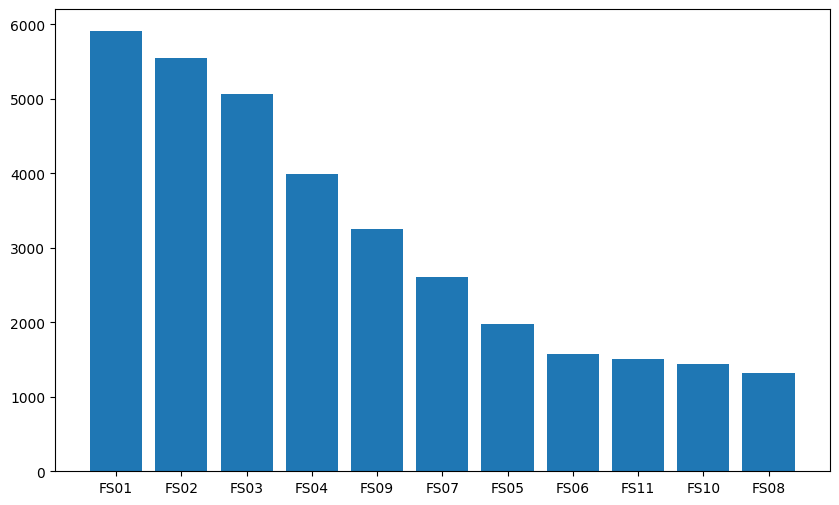

In [8]:
total_FS = data_pt[col_names].sum()

prop_FS = total_FS
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

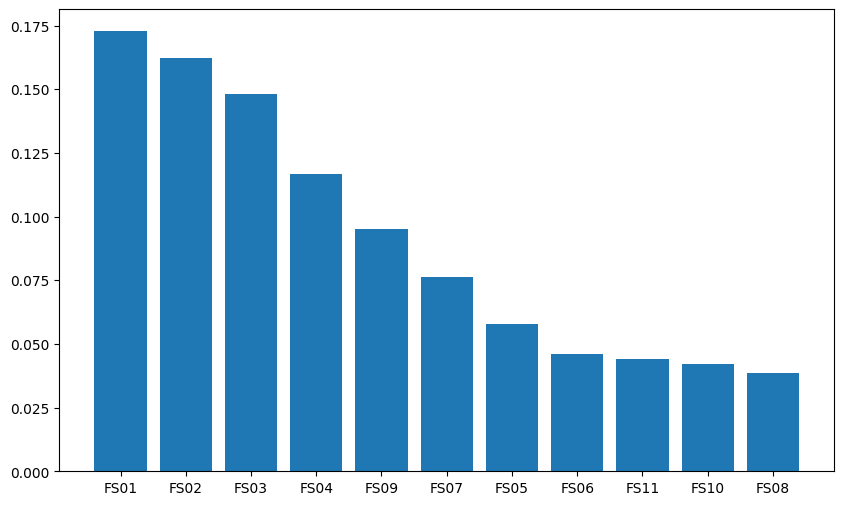

In [9]:
total_skill = data_pt[col_names].sum()

prop_FS = total_FS / total_FS.sum()
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

In [10]:
data_pt

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,1004,836,748,628,318,418,607,267,716,276,289
C2,962,841,737,478,299,321,557,152,555,223,212
C3,944,806,571,710,370,173,256,273,384,234,257
C4,938,1405,1485,987,399,186,338,160,559,212,258
C5,1416,1071,985,728,362,302,569,260,688,316,307
C6,643,593,534,455,235,168,276,213,354,182,183


In [11]:
my_ca = CA(row_labels=data_pt.index.values, col_labels=data_pt.columns.values,stats=True)

In [12]:
my_ca.fit(data_pt.values)


CA(col_labels=array(['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08',
       'FS09', 'FS10', 'FS11'], dtype=object),
   row_labels=array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object))

In [13]:
my_ca.eig_

array([[2.39409187e-02, 9.50991120e-03, 2.23951274e-03, 6.21508581e-04,
        2.52672198e-04],
       [6.54758123e+01, 2.60085742e+01, 6.12482410e+00, 1.69975846e+00,
        6.91031016e-01],
       [6.54758123e+01, 9.14843864e+01, 9.76092105e+01, 9.93089690e+01,
        1.00000000e+02]])

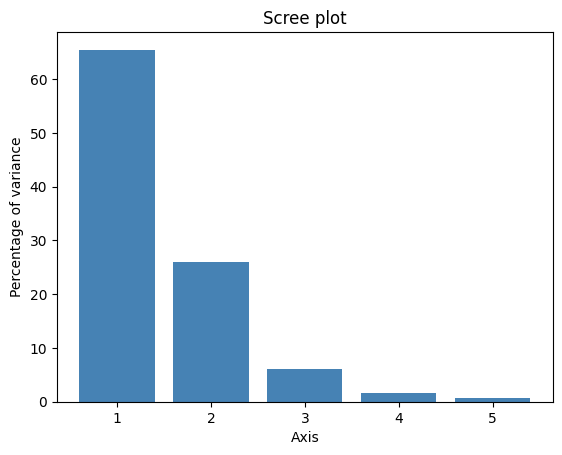

In [14]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues(type="percentage")

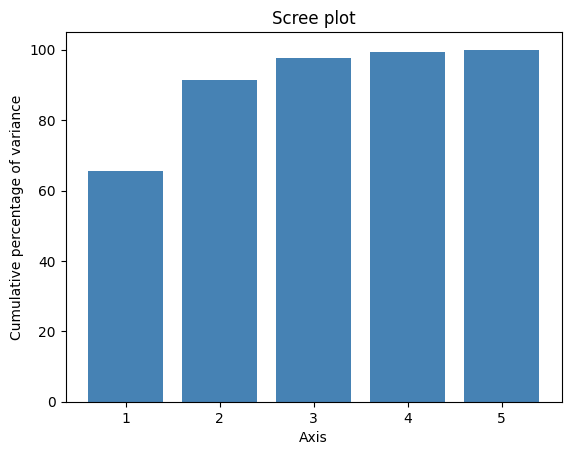

In [15]:
my_ca.plot_eigenvalues(type="cumulative")


Premier axe factoriel


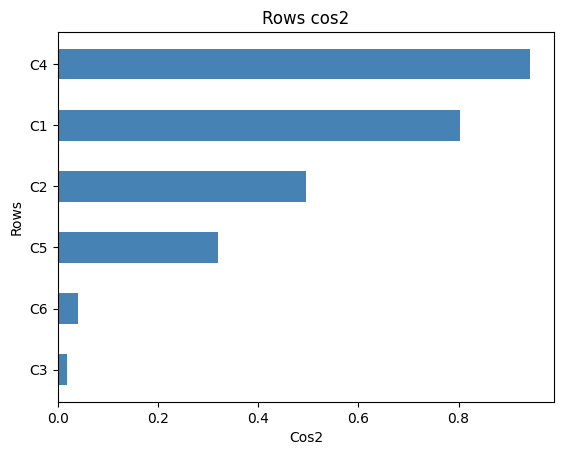

Second axe factoriel


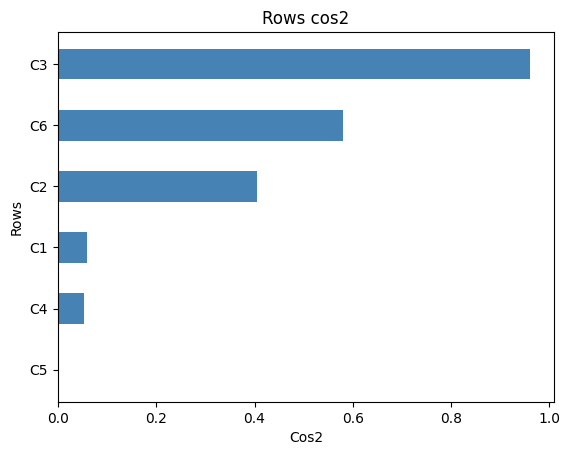

In [16]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)

Premier axe factoriel


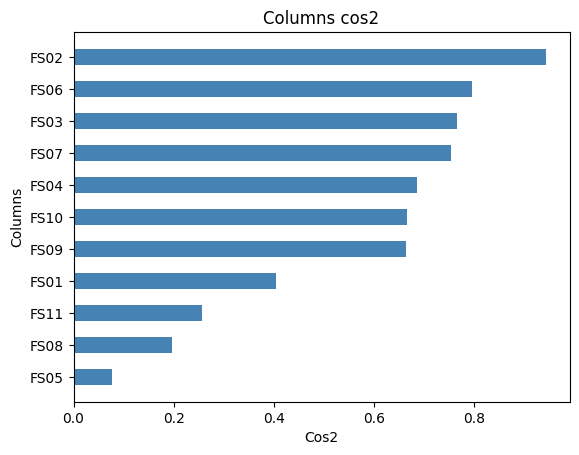

Second axe factoriel


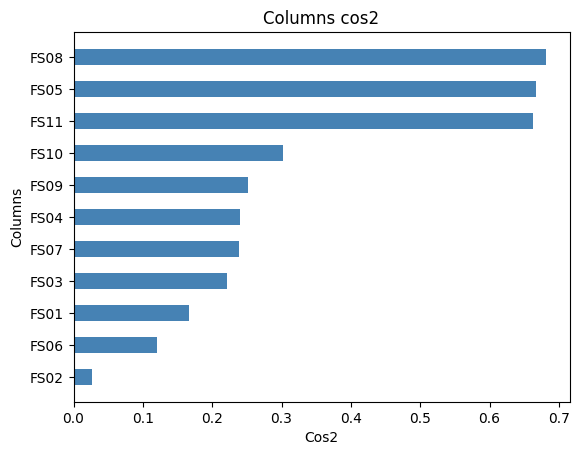

In [17]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Premier axe


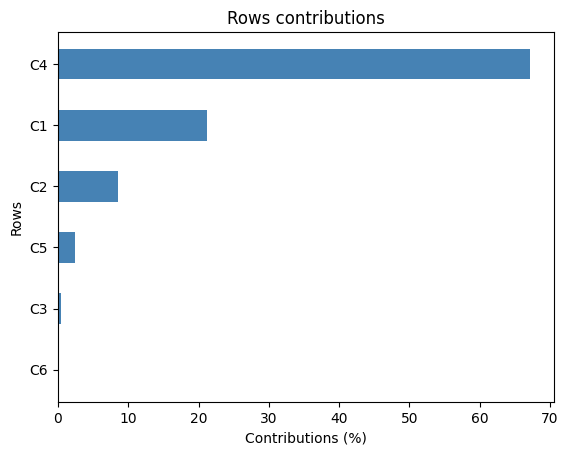

Second axe


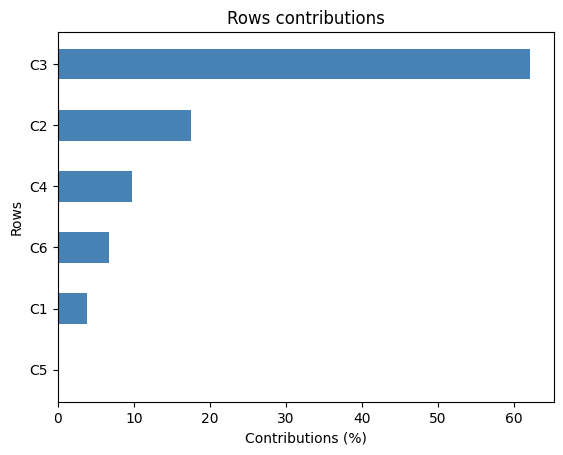

In [18]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

Premier axe


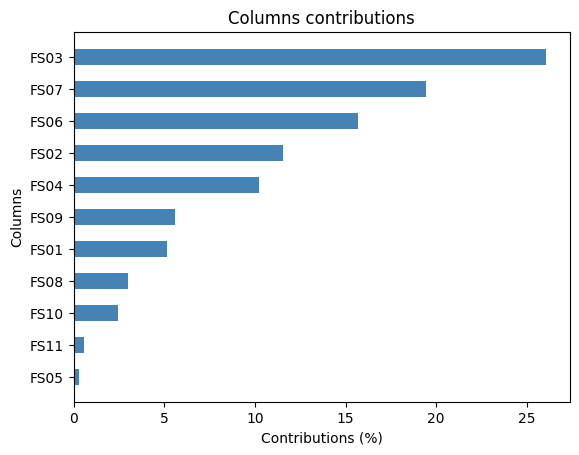

Second axe


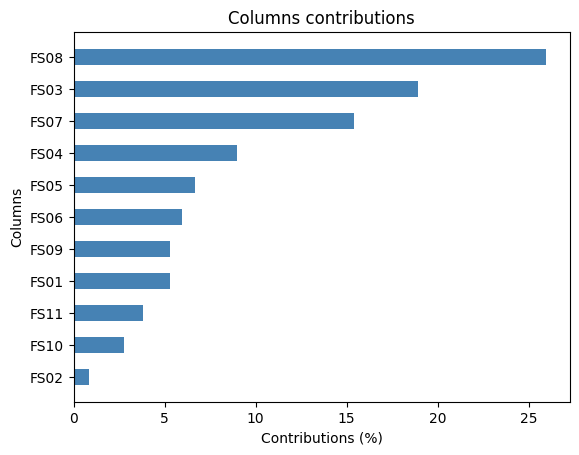

In [19]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

In [20]:
info_skill=my_ca.row_topandas()
info_skill

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_contrib_dim5,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5
C1,-0.168665,0.045447,-0.067906,0.007043,0.016320,21.225129,3.879486,36.779510,1.425453,18.827953,0.802695,0.058279,0.130112,1.399456e-03,0.007515
C2,-0.114321,0.103377,0.028741,-0.038979,-0.015270,8.521648,17.542071,5.757687,38.162434,14.405877,0.496278,0.405806,0.031366,5.769576e-02,0.008854
C3,0.027688,-0.201434,0.001243,-0.028567,0.008037,0.466237,62.123524,0.010043,19.117966,3.721992,0.018156,0.960951,0.000037,1.932669e-02,0.001530
C4,0.281749,0.067449,-0.014685,-0.000077,0.003378,67.180314,9.692482,1.950998,0.000192,0.915112,0.943245,0.054057,0.002562,6.983838e-08,0.000136
C5,-0.053154,-0.000477,0.072335,0.027029,0.007972,2.417616,0.000491,47.863272,24.080377,5.152123,0.319174,0.000026,0.591092,8.252959e-02,0.007179
C6,-0.020085,-0.075706,-0.039047,0.030879,-0.035821,0.189057,6.761946,7.638491,17.213579,56.976944,0.040764,0.579156,0.154067,9.635315e-02,0.129659


In [21]:
info_FS=my_ca.col_topandas()
info_FS

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5
FS01,-0.084334,-0.054099,0.086530,0.004491,0.007514,5.132633,5.317227,57.764466,0.560763,3.861033,0.404031,0.166263,0.425352,0.001146,0.003208
FS02,0.130594,0.022052,0.007942,-0.019996,-0.007694,11.568321,0.830379,0.457317,10.447250,3.804952,0.944174,0.026921,0.003491,0.022136,0.003278
FS03,0.205267,0.110305,-0.001297,0.025583,-0.008922,26.047172,18.935523,0.011123,15.585069,4.662488,0.765561,0.221071,0.000031,0.011891,0.001446
FS04,0.144861,-0.085628,-0.040424,-0.008460,0.023594,10.219106,8.988840,8.506890,1.342563,25.685887,0.686242,0.239775,0.053438,0.002340,0.018204
FS05,0.035470,-0.104561,-0.014822,-0.060171,-0.018615,0.304803,6.668114,0.568973,33.788594,7.954175,0.076818,0.667547,0.013414,0.221065,0.021157
FS06,-0.286176,0.111279,-0.086117,-0.030048,0.013165,15.688679,5.971854,15.187324,6.662691,3.146054,0.796878,0.120490,0.072160,0.008785,0.001687
FS07,-0.247109,0.138794,0.004268,-0.013465,-0.018148,19.418905,15.422395,0.061937,2.221151,9.923785,0.755210,0.238249,0.000225,0.002242,0.004073
FS08,-0.135940,-0.252308,-0.084246,0.052954,-0.037335,2.991474,25.942697,12.282209,17.485419,21.380404,0.197783,0.681325,0.075961,0.030011,0.014919
FS09,-0.118624,0.072875,-0.028929,0.023694,0.019097,5.597647,5.318437,3.558903,8.602436,13.745796,0.665470,0.251156,0.039578,0.026549,0.017247
FS10,-0.117737,-0.079372,0.008728,0.019778,-0.013279,2.443793,2.795974,0.143556,2.656458,2.945335,0.666265,0.302797,0.003661,0.018801,0.008475


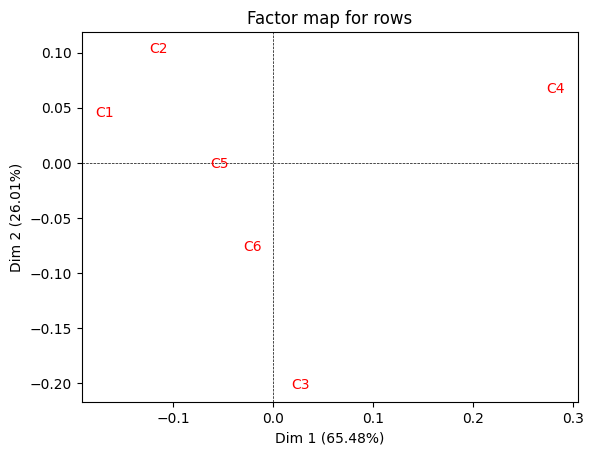

In [22]:
# Graphique des compétences (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

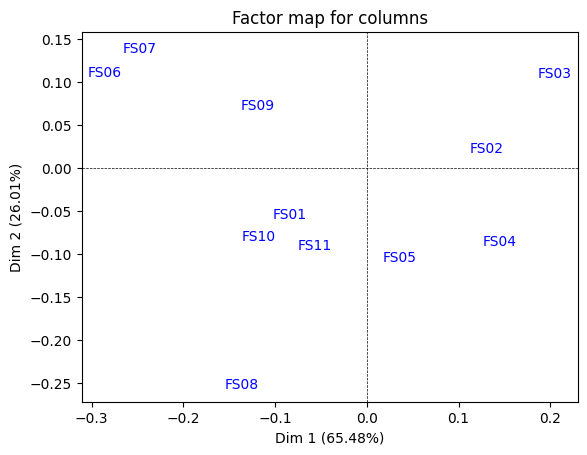

In [23]:
# Graphique des familles de situation (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

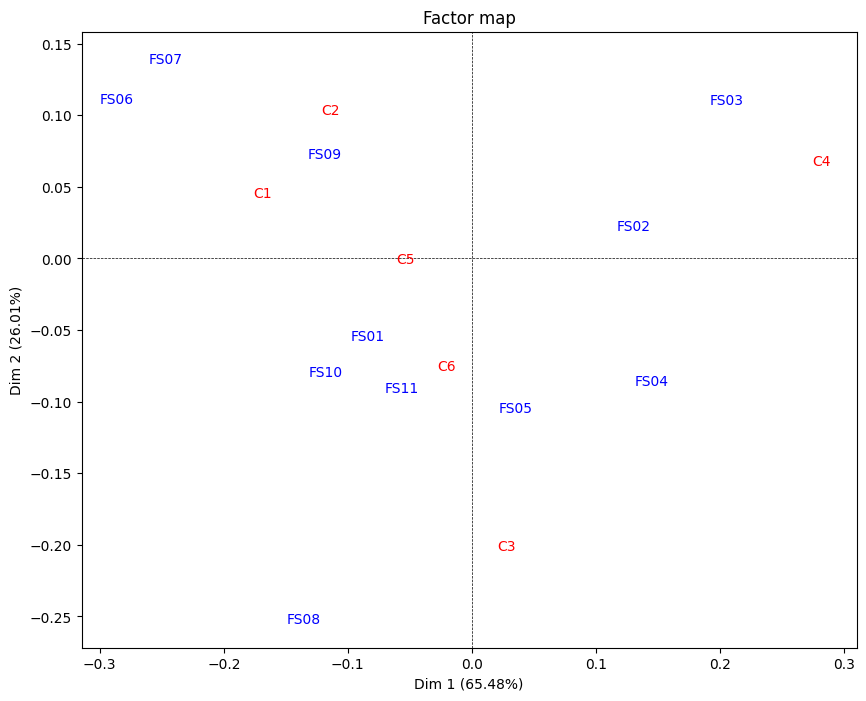

In [24]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(10, 8))